<a href="https://colab.research.google.com/github/Jeevasri26/JeevasriS/blob/main/Jeevasri_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

##LOADING THE DATASET

In [2]:
# Load the dataset
data = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

#DATASETS

In [3]:
data.shape

(1014, 7)

In [4]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [5]:
# Display the first few rows of the dataset
print(data.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [6]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [7]:
# Check for missing values
print(data.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [8]:
# Describe the dataset for statistical overview
print(data.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


##DATA PREPROCESSING

In [9]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [10]:
# Handle missing values
data = data.dropna()

In [11]:
# Handle outliers (e.g., using IQR)
numerical_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Check the number of records after outlier removal
print(f"Number of records after outlier removal: {data.shape[0]}")

Number of records after outlier removal: 1014


In [13]:
# Normalize the numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [14]:
# Display the first few rows of the preprocessed dataset
print(data.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0 -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956  high risk
1  0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088  high risk
2 -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815  high risk
3  0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088  high risk
4  0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054   low risk


##Exploratory Data Analysis (EDA)

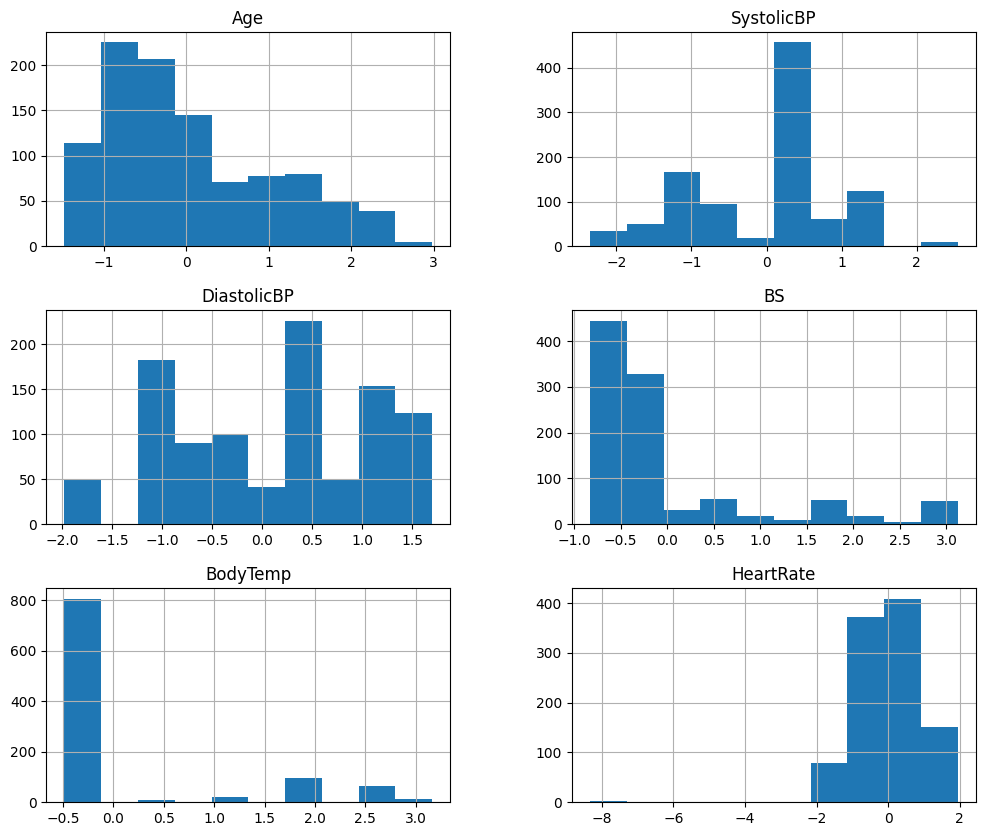

In [15]:
# Plot histograms for each feature
data.hist(figsize=(12, 10))
plt.show()

In [16]:
# Calculate correlation matrix for numerical columns only
correlation_matrix = data[numerical_cols].corr()

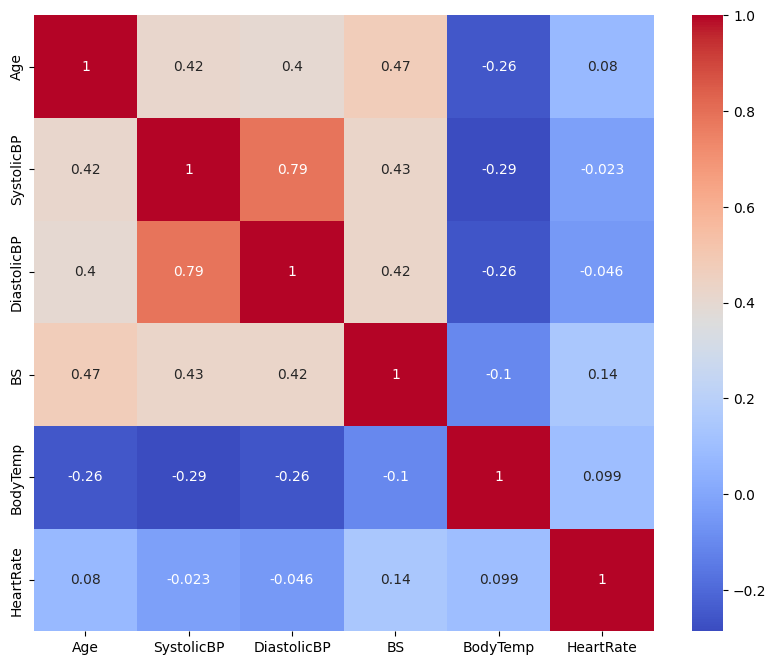

In [17]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

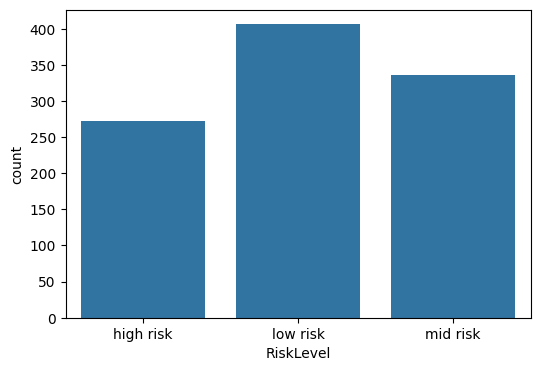

In [18]:
# Plot risk level distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='RiskLevel', data=data)
plt.show()


##Feature Engineering

In [19]:
# Create interaction terms (example)
data['Age_SystolicBP'] = data['Age'] * data['SystolicBP']
data['Age_DiastolicBP'] = data['Age'] * data['DiastolicBP']

In [20]:
# Polynomial features
data['Age_squared'] = data['Age'] ** 2

In [21]:
# Binning continuous variables
data['Age_binned'] = pd.cut(data['Age'], bins=5, labels=False)

In [22]:
# Display the first few rows of the dataset with new features
print(data.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0 -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956   
1  0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088   
2 -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815   
3  0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088   
4  0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054   

   RiskLevel  Age_SystolicBP  Age_DiastolicBP  Age_squared  Age_binned  
0  high risk       -0.330410        -0.092251     0.130854           1  
1  high risk        0.554802         0.371463     0.144991           2  
2  high risk        0.081635         0.030132     0.004190           1  
3  high risk        0.013870         0.005857     0.000091           1  
4   low risk        0.140798        -0.451605     0.144991           2  


##Model Building

In [23]:
# Split the data
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression:
               precision    recall  f1-score   support

   high risk       0.77      0.85      0.81        47
    low risk       0.62      0.88      0.73        80
    mid risk       0.64      0.33      0.43        76

    accuracy                           0.67       203
   macro avg       0.68      0.69      0.66       203
weighted avg       0.66      0.67      0.64       203

Accuracy: 0.6650246305418719


In [25]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Support Vector Classifier:\n", classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

Support Vector Classifier:
               precision    recall  f1-score   support

   high risk       0.81      0.83      0.82        47
    low risk       0.61      0.88      0.72        80
    mid risk       0.71      0.38      0.50        76

    accuracy                           0.68       203
   macro avg       0.71      0.70      0.68       203
weighted avg       0.69      0.68      0.66       203

Accuracy: 0.6798029556650246


##Model evaluvation and selection

In [26]:
# Compare models based on accuracy or other metrics
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_logreg = grid_search.best_estimator_

In [28]:
# Evaluate the fine-tuned model
y_pred_best_logreg = best_logreg.predict(X_test)
print("Fine-tuned Logistic Regression:\n", classification_report(y_test, y_pred_best_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_best_logreg))

Fine-tuned Logistic Regression:
               precision    recall  f1-score   support

   high risk       0.79      0.87      0.83        47
    low risk       0.62      0.90      0.73        80
    mid risk       0.69      0.32      0.43        76

    accuracy                           0.67       203
   macro avg       0.70      0.70      0.67       203
weighted avg       0.68      0.67      0.64       203

Accuracy: 0.6748768472906403
